In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Reading Data
path = '..\listings.csv'
df = pd.read_csv(path)

# Descovering Data
df.head()
print(set(df.columns))

{'guests_included', 'summary', 'space', 'street', 'security_deposit', 'beds', 'review_scores_location', 'access', 'zipcode', 'experiences_offered', 'country_code', 'state', 'first_review', 'host_acceptance_rate', 'review_scores_communication', 'number_of_reviews', 'calculated_host_listings_count', 'extra_people', 'host_neighbourhood', 'name', 'id', 'interaction', 'host_url', 'requires_license', 'country', 'jurisdiction_names', 'listing_url', 'thumbnail_url', 'price', 'cancellation_policy', 'host_picture_url', 'host_listings_count', 'availability_90', 'host_total_listings_count', 'square_feet', 'license', 'calendar_last_scraped', 'instant_bookable', 'amenities', 'host_thumbnail_url', 'neighborhood_overview', 'minimum_nights', 'description', 'host_identity_verified', 'smart_location', 'medium_url', 'room_type', 'weekly_price', 'has_availability', 'availability_365', 'host_has_profile_pic', 'availability_60', 'host_since', 'host_name', 'transit', 'host_about', 'reviews_per_month', 'last_r

Question 2:
What is the average price of listings in each neighborhood?

In [32]:
# Selecting all the columns that is related to the question
columns_of_interest = ['neighbourhood_cleansed', 'price']

df_subset = df[columns_of_interest]
df_subset

,neighbourhood_cleansed,price
0,Roslindale,$250.00
1,Roslindale,$65.00
2,Roslindale,$65.00
3,Roslindale,$75.00
4,Roslindale,$79.00
...,...,...
3580,Charlestown,$69.00
3581,Allston,$150.00
3582,Charlestown,$198.00
3583,Charlestown,$65.00


In [33]:
# Checking for null values
np.sum(df_subset.isnull(), axis=0)

# Since there are no null values we will not need to do any cleaning

neighbourhood_cleansed    0
price                     0
dtype: int64

In [34]:
# Descovering the dataset columns type
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   neighbourhood_cleansed  3585 non-null   object
 1   price                   3585 non-null   object
dtypes: object(2)
memory usage: 56.1+ KB


In [ ]:
# Converting the price column from objects into floats se we can deal with them
df_subset['price'] = df_subset['price'].replace('[\\$,]', '', regex=True).astype(float)

In [39]:
# Calculate the average price per neighbourhood
average_price_per_neighbourhood = df_subset.groupby('neighbourhood_cleansed')['price'].mean().reset_index()

# Renaming the columns for clarity
average_price_per_neighbourhood.columns = ['Neighbourhood', 'Average Price']

# Sorting by the average price for better visualization
average_price_per_neighbourhood = average_price_per_neighbourhood.sort_values(by='Average Price', ascending=False)

In [40]:
print(average_price_per_neighbourhood)

              Neighbourhood  Average Price
21  South Boston Waterfront     306.060241
2               Bay Village     266.833333
13         Leather District     253.600000
1                  Back Bay     240.950331
8                  Downtown     236.459302
6                 Chinatown     232.352113
3               Beacon Hill     224.443299
10                   Fenway     220.393103
23                 West End     209.591837
22                South End     204.349693
5               Charlestown     198.045045
17                North End     195.678322
20             South Boston     187.609195
19                  Roxbury     146.333333
12            Jamaica Plain     138.478134
14    Longwood Medical Area     138.444444
16             Mission Hill     121.967742
9               East Boston     119.153333
4                  Brighton     118.767568
0                   Allston     112.307692
24             West Roxbury     107.108696
18               Roslindale      98.428571
7          

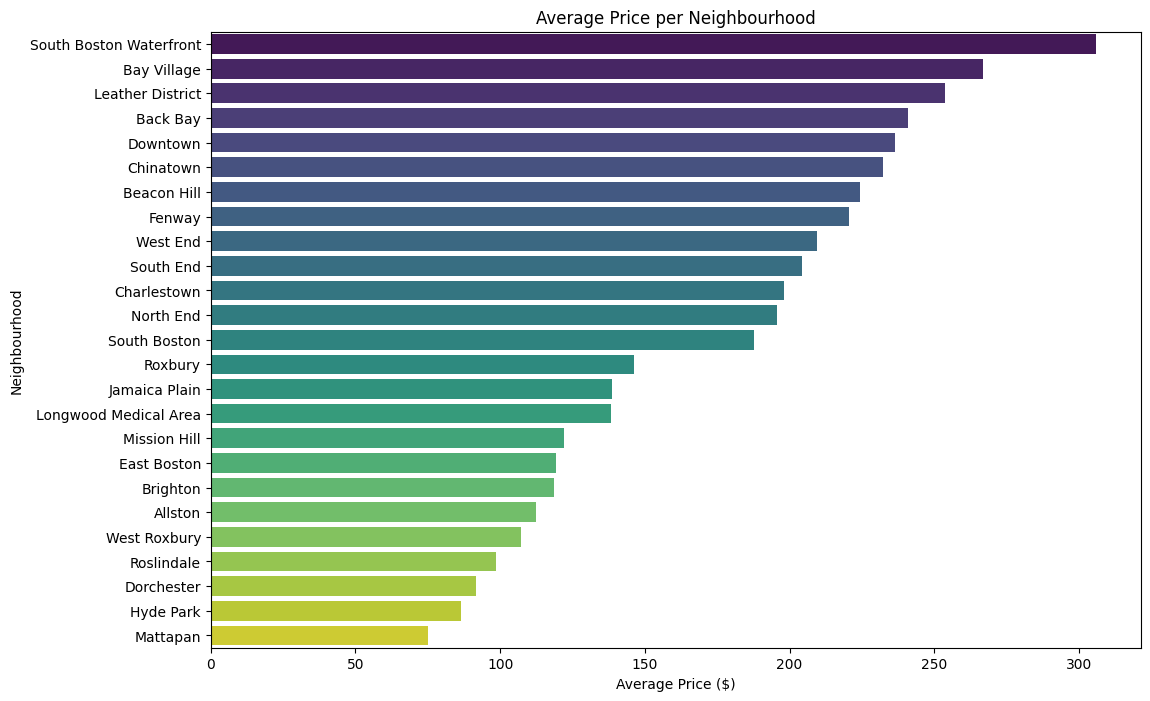

In [42]:
# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x='Average Price', y='Neighbourhood', hue='Neighbourhood', data=average_price_per_neighbourhood, palette='viridis', dodge=False, legend=False)

plt.title('Average Price per Neighbourhood')
plt.xlabel('Average Price ($)')
plt.ylabel('Neighbourhood')
plt.show()